This project deals with extracting topics for news articles and also extracts details such as person name, location and organization for each story.

Dataset – The dataset contains two files Startup_data.xlsx and cities_r2.csv

The cities_r2.csv files would help in finding the cities for each Startup

The attributes of Startup_data.xlsx are:-

1. STARTUP NEWS -> The news article posted online on website (HEADLINE)

2. SUMMARY      -> A shorthand summary of the news article

3. POSTED BY    -> Name of person who posted the startup news

4. DESCRIPTION  -> The complete information or story of that news

## TASK 1: - Loading the dataset

1. Loading the necessary libraries into python.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import matplotlib.pyplot as plt

2. Loading the dataset Startup_data.xlsx into python using pandas data frame and name it as startup_data.

In [2]:
startup_data = pd.read_excel('Startup-data.xlsx', names=['startup_news', 'summary', 'posted_by', 'description'])

In [3]:
startup_data.head()

,startup_news,summary,posted_by,description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,Puneet Kumar,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,NaN,Vishal Krishna,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,NaN,Kamalika Bhattacharya,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...",Sindhu Kashyap,"A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,NaN,Team YS,"Two years ago, Facebook India launched a uniqu..."


In [4]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
startup_news    20 non-null object
summary         12 non-null object
posted_by       20 non-null object
description     20 non-null object
dtypes: object(4)
memory usage: 720.0+ bytes


__Summary column has 8 null entries__

## TASK 2: - Data Cleaning and Wrangling

1. Combining the Startup_News, Summary and Description columns to a new column Content.

In [7]:
news_data = startup_data[['startup_news', 'summary', 'description']]
news_data.fillna('', inplace=True)
news_data.head()

,startup_news,summary,description
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ..."
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand..."
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu..."


Joining all 3 columns of each row into a single string.

In [8]:
text = []
for i in range(len(news_data)):
    temp = ' '.join(news_data.iloc[i].tolist())
    text.append(temp)

Adding the content column into news_data Data Frame

In [9]:
news_data['content'] = pd.DataFrame(text)

In [10]:
news_data.head()

,startup_news,summary,description,content
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...


2. Convert the Content column to a list using a suitable method

In [11]:
content_list = news_data['content'].tolist()

converting all words to lower case to avoid any ambiguities.

In [12]:
content_list = [i.lower() for i in content_list]    

In [13]:
content_list

['how pubg has redefined the indian gaming ecosystem forever indians are well and truly addicted to pubg thanks to affordable broadband access all over the country. the success of this online multiplayer game is clearly an inflection point for the indian gaming industry. will desi titles finally succeed?  earlier this month, i went to my home town in rajasthan and played pubg in the overnight bus from jaipur to bikaner. i thought i would play one game while the bus was still in jaipur as the game requires high speed data to play with 100 players synchronously. to my surprise, i ended up playing for four straight hours through the night while the bus travelled through rural rajasthan - and the game worked throughout! it was just one example of how india is now truly connected and how things that we thought were unimaginable not so long ago are a reality today. when jio rolled out its nationwide network and slashed wireless broadband prices, it unleashed – among other things – the tailwi

3. We Make a function named as clean that accepts a string and only returns string having all characters as numbers, alphabet and special characters only.

Removing the extra characters 

In [14]:
def clean(string):
    result = ''
    for char in string:
        if ord(char) < 127:
            result += char
    return result

In [15]:
content_list = [clean(string) for string in content_list]

This is the final list with clean text data.

In [16]:
content_list

['how pubg has redefined the indian gaming ecosystem forever indians are well and truly addicted to pubg thanks to affordable broadband access all over the country. the success of this online multiplayer game is clearly an inflection point for the indian gaming industry. will desi titles finally succeed?  earlier this month, i went to my home town in rajasthan and played pubg in the overnight bus from jaipur to bikaner. i thought i would play one game while the bus was still in jaipur as the game requires high speed data to play with 100 players synchronously. to my surprise, i ended up playing for four straight hours through the night while the bus travelled through rural rajasthan - and the game worked throughout! it was just one example of how india is now truly connected and how things that we thought were unimaginable not so long ago are a reality today. when jio rolled out its nationwide network and slashed wireless broadband prices, it unleashed  among other things  the tailwind

## TASK 3: - Natural Language Processing

1. After cleaning of text we will apply natural language processing to each story.

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

We don't want space to be recognised as a word.
So, we convert it to a punctuation.

In [18]:
nlp.vocab[" "].is_punct = True

### Tokenization:
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation, spaces, newline etc.

This function will first tokenize the given text data in content_list and remove unnecessary stop words and punctuations. 

In [19]:
def remove_stop(string):
    doc = []
    docx = nlp(string) #tokenization is done here
    for i in docx:
        if i.is_stop!=True and i.is_punct!=True: #stop words and punctuation are removed here
            doc.append(i.lemma_)
    return doc

### Corpus:
In linguistics, a corpus (plural corpora) or text corpus is a large and structured set of texts (nowadays usually electronically stored and processed). In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Below, corpuses is a list of corpus of each news article.

In [20]:
corpuses = [remove_stop(j) for j in content_list]

In [21]:
corpuses

[['pubg',
  'redefine',
  'indian',
  'gaming',
  'ecosystem',
  'forever',
  'indian',
  'truly',
  'addict',
  'pubg',
  'thank',
  'affordable',
  'broadband',
  'access',
  'country',
  'success',
  'online',
  'multiplayer',
  'game',
  'clearly',
  'inflection',
  'point',
  'indian',
  'gaming',
  'industry',
  'desi',
  'title',
  'finally',
  'succeed',
  'earlier',
  'month',
  'go',
  'home',
  'town',
  'rajasthan',
  'play',
  'pubg',
  'overnight',
  'bus',
  'jaipur',
  'bikaner',
  'think',
  'play',
  'game',
  'bus',
  'jaipur',
  'game',
  'require',
  'high',
  'speed',
  'datum',
  'play',
  '100',
  'player',
  'synchronously',
  'surprise',
  'end',
  'play',
  'straight',
  'hour',
  'night',
  'bus',
  'travel',
  'rural',
  'rajasthan',
  'game',
  'work',
  'example',
  'india',
  'truly',
  'connected',
  'thing',
  'think',
  'unimaginable',
  'long',
  'ago',
  'reality',
  'today',
  'jio',
  'roll',
  'nationwide',
  'network',
  'slash',
  'wireless',
 

## TASK 4: - Text Visualization
After applying natural language processing to each test we take top 5 stories and visualize most frequent words in those 5 stories using Wordcloud library in python.

In [22]:
from wordcloud import WordCloud

The command below would join the top 5 stories into a single string.

In [23]:
corpus_string = ''
for i in range(5):
    corpus_string += ' '.join(corpuses[i])

Creating a wordcloud object called w_cloud.

In [24]:
w_cloud = WordCloud(background_color='white', max_words=50).generate(corpus_string)

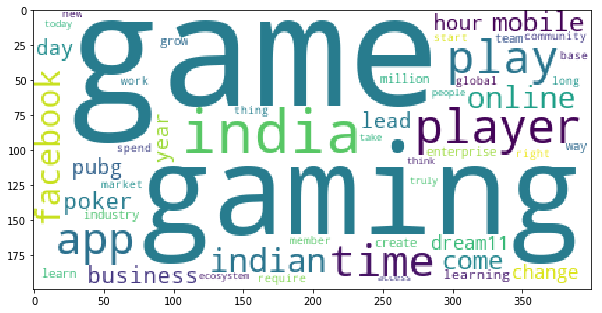

In [25]:
plt.figure(figsize=(10,12))
plt.imshow(w_cloud)
plt.show()

__From the word cloud we can observe, that the most frequent words are:__

game, gaming, india, player, app.

## TASK 5: - Topic Modelling
Now we apply topic modeling LDA algorithm to each and every news article and extract 10 topics for each news article and store it into a new column corresponding to each news.

In [26]:
import gensim
from gensim import corpora

### Dictionary:
__Dictionary is a list of unique words from the corpus.__


In [27]:
import re

In [28]:
Lda = gensim.models.ldamodel.LdaModel

In [29]:
#this function takes input the result of lda model, and return the list of 10 topics
def extract_topics(lda_result):
    topic_list = []
    for element in lda_result:
        regex = "[a-z]+"
        text = element[1]
        topic_list.append(re.findall(regex, text))
    dictionary = corpora.Dictionary(topic_list)
    dictionary = dictionary.token2id
    topic_list = list(dictionary.keys())[:10]
    return topic_list

In [30]:
# this function will take corpus of a single news article and return a list of 10 topics 
def lda_modelling(corpus):
    dictionary = corpora.Dictionary(corpus)
    bag_of_words = [dictionary.doc2bow(corpus[0])]
    lda_model = Lda(bag_of_words, num_topics=10, id2word = dictionary, passes=50)
    result_of_lda = lda_model.print_topics(num_topics=10, num_words=8)
    return extract_topics(result_of_lda)

We make a list called topics.

topics list will contain 20 lists containing 10 topics from each article.

In [31]:
topics = []
for corpus in corpuses:
    corpus = [corpus] #converting into 2d
    topics.append(lda_modelling(corpus))

Below are the topics extracted from each news article.

In [32]:
topics

[['app',
  'game',
  'gaming',
  'india',
  'indian',
  'play',
  'player',
  'time',
  'day',
  'pubg'],
 ['company',
  'dream',
  'funding',
  'gaming',
  'india',
  'percent',
  'raise',
  'accord',
  'million',
  'billion'],
 ['business',
  'change',
  'enterprise',
  'game',
  'gaming',
  'learn',
  'learning',
  'require',
  'industry',
  'player'],
 ['amit',
  'card',
  'game',
  'like',
  'madoverpoker',
  'mba',
  'online',
  'poker',
  'pitti',
  'platform'],
 ['community',
  'encourage',
  'entrepreneur',
  'facebook',
  'member',
  'sheleadstech',
  'woman',
  'year',
  'come',
  'tool'],
 ['america',
  'company',
  'confidence',
  'man',
  'number',
  'percent',
  'woman',
  'world',
  'performance',
  'example'],
 ['balloon',
  'box',
  'captain',
  'day',
  'handloom',
  'manage',
  'marvel',
  'seema',
  'talk',
  'festival'],
 ['like',
  'mehrotra',
  'necessity',
  'need',
  'not',
  'one',
  'person',
  'pillow',
  'career',
  'category'],
 ['continue',
  'delivery',

## Task 6: Categorizing each news article
We categorize each story into the following ones:-

1. Games
2. Startup
3. Fund
4. Science
5. Women

### Lemmatization:
The goal of lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
For example: Base form of words, such as organize, organizes, and organizing will be __organize__.
Base form is called lemma.

In [33]:
list_of_categories = ['Games', 'Startup', 'Fund', 'Science', 'Women']

we need to lemmatize the names of categories, so it will be easier to match them with the corpus.

In [34]:
string = nlp('games startup fund science women')
string

games startup fund science women

In [35]:
lemmas_of_categories = []

In [36]:
for i in string:
    lemmas_of_categories.append(i.lemma_)

In [37]:
lemmas_of_categories

['game', 'startup', 'fund', 'science', 'woman']

This mapping maps the lemma of a category to its original name.

In [38]:
mapping = list(zip(lemmas_of_categories, list_of_categories))
mapping

[('game', 'Games'),
 ('startup', 'Startup'),
 ('fund', 'Fund'),
 ('science', 'Science'),
 ('woman', 'Women')]

Now, we create a pandas series which describes the category of a news article.

It will be added to the news_data dataframe.

In [41]:
category_list = []
# here, we searched for the category name in corpus of each news article.
# and assigned the corresponding category names.
for index, story in enumerate(corpuses):
    category_list.append([])
    for categ_lemma, categ_name in mapping:
        if categ_lemma in story:
            category_list[index].append(categ_name)

In [42]:
category_list

[['Games'],
 ['Games', 'Fund'],
 ['Games', 'Startup'],
 ['Games'],
 ['Startup', 'Women'],
 ['Women'],
 ['Women'],
 ['Fund', 'Women'],
 ['Startup', 'Women'],
 ['Startup', 'Science'],
 ['Startup', 'Science'],
 ['Science'],
 ['Startup', 'Science'],
 ['Startup', 'Fund'],
 ['Startup', 'Fund'],
 ['Startup'],
 ['Startup'],
 ['Startup'],
 ['Startup'],
 ['Startup']]

converting the inner lists into strings

In [43]:
category = []
for i in category_list:
    category.append(', '.join(i))

In [44]:
category

['Games',
 'Games, Fund',
 'Games, Startup',
 'Games',
 'Startup, Women',
 'Women',
 'Women',
 'Fund, Women',
 'Startup, Women',
 'Startup, Science',
 'Startup, Science',
 'Science',
 'Startup, Science',
 'Startup, Fund',
 'Startup, Fund',
 'Startup',
 'Startup',
 'Startup',
 'Startup',
 'Startup']

now we assign this list as a column in the news_data Data Frame.

In [45]:
news_data['categories'] = pd.DataFrame(category)

In [48]:
news_data.head()

,startup_news,summary,description,content,categories
0,How PUBG has redefined the Indian gaming ecosy...,Indians are well and truly addicted to PUBG th...,"Earlier this month, I went to my home town in ...",How PUBG has redefined the Indian gaming ecosy...,Games
1,Dream11 closes $100 M funding led by Tencent; ...,,Sports fantasy gaming company Dream11 has rais...,Dream11 closes $100 M funding led by Tencent; ...,"Games, Fund"
2,How enterprise gaming has grown from a ridicul...,,Having spent a large part of my career in the ...,How enterprise gaming has grown from a ridicul...,"Games, Startup"
3,These MBA grads are changing the way India loo...,"From online tournaments to events, online poke...","A deal, bated breath, a flush, a straight hand...",These MBA grads are changing the way India loo...,Games
4,Facebook is celebrating two years of encouragi...,,"Two years ago, Facebook India launched a uniqu...",Facebook is celebrating two years of encouragi...,"Startup, Women"


## TASK 7: - Finding more insights of data

Use of NER to find person name, location and organization name for each news article.

### To recognise names of Indian cities:
We make use of the cities_r2.csv data set.

In [50]:
cities = pd.read_csv('cities_r2.csv')

Now, we apply lambda function on the Series cities['name_of_city'], 
to remove the whitespaces at the end of each city name.

In [51]:
cities['name_of_city'] = cities['name_of_city'].apply(func=(lambda x:x[:-1]))
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3.0,PUNJAB,9.0,145238.0,76840.0,68398.0,15870.0,8587.0,7283.0,...,44972.0,890.0,848.0,79.86,85.49,73.59,"30.1452928,74.1993043",16287.0,8612.0,7675.0
1,Achalpur,27.0,MAHARASHTRA,7.0,112293.0,58256.0,54037.0,11810.0,6186.0,5624.0,...,43086.0,928.0,909.0,91.99,94.77,89.00,"21.257584,77.5086754",8863.0,5269.0,3594.0
2,Adilabad,28.0,ANDHRA PRADESH,1.0,117388.0,59232.0,58156.0,13103.0,6731.0,6372.0,...,37660.0,982.0,947.0,80.51,88.18,72.73,"19.0809075,79.560344",10565.0,6797.0,3768.0
3,Adityapur,20.0,JHARKHAND,24.0,173988.0,91495.0,82493.0,23042.0,12063.0,10979.0,...,54515.0,902.0,910.0,83.46,89.98,76.23,"22.7834741,86.1576889",19225.0,12189.0,7036.0
4,Adoni,28.0,ANDHRA PRADESH,21.0,166537.0,82743.0,83794.0,18406.0,9355.0,9051.0,...,45089.0,1013.0,968.0,68.38,76.58,60.33,"15.6322227,77.2728368",11902.0,7871.0,4031.0


In [52]:
#This is a list of Indian cities' names
names_of_cities = cities['name_of_city'].tolist()
names_of_cities

['Abohar',
 'Achalpur',
 'Adilabad',
 'Adityapur',
 'Adoni',
 'Agartala',
 'Agra',
 'Ahmadabad',
 'Ahmadnagar',
 'Aizawl',
 'Ajmer',
 'Akbarpur',
 'Akola',
 'Alandur',
 'Alappuzha',
 'Aligarh',
 'Allahabad',
 'Alwar',
 'Ambala',
 'Ambala Sadar',
 'Ambarnath',
 'Ambattur',
 'Ambikapur',
 'Ambur',
 'Amravati',
 'Amreli',
 'Amritsar',
 'Amroha',
 'Anand',
 'Anantapur',
 'Anantnag',
 'Arrah',
 'Asansol',
 'Ashoknagar Kalyangarh',
 'Aurangabad',
 'Aurangabad',
 'Avadi',
 'Azamgarh',
 'Badlapur',
 'Bagaha',
 'Bagalkot',
 'Bahadurgarh',
 'Baharampur',
 'Bahraich',
 'Baidyabati',
 'Baleshwar Town',
 'Ballia',
 'Bally',
 'Bally Cit',
 'Balurghat',
 'Banda',
 'Bankura',
 'Bansberia',
 'Banswara',
 'Baran',
 'Baranagar',
 'Barasat',
 'Baraut',
 'Barddhaman',
 'Bareilly',
 'Baripada Town',
 'Barnala',
 'Barrackpur',
 'Barshi',
 'Basirhat',
 'Basti',
 'Batala',
 'Bathinda',
 'Beawar',
 'Begusarai',
 'Belgaum',
 'Bellary',
 'Bengalur',
 'Bettiah',
 'Betul',
 'Bhadrak',
 'Bhadravati',
 'Bhadreswar',


Now, we make the extractor function:

In [55]:
location = [] 
organization_name = []
person_name = [] 

In [56]:
# this function takes input a news article as string,
# and then extracts entity names,
# then save the names in the global variables location, organization_name and person_name.
def entity_extractor(string):
    global location, organization_name, person_name, names_of_cities
    loc = []
    org = []
    per = []
    docx = nlp(string)
    for ent in docx.ents: #iteration for each entity in the current article
        #print(ent.text)
        if ent.label_ == 'PERSON':
            per.append(ent.text)
        elif ent.label_ == 'ORG':
            org.append(ent.text)
        elif ent.label_ == 'GPE' or (ent.text in names_of_cities): # to extract locations
            loc.append(ent.text)
    location.append(set(loc))
    organization_name.append(set(org))
    person_name.append(set(per))

Here, we make a list of all news articles as strings.

In [57]:
news_content = news_data['content'].tolist()

In [58]:
for news in news_content:
    entity_extractor(news)

In [60]:
print('Names of locations\n',location)

Names of locations
 [{'Jaipur', 'India', 'Rajasthan', 'Bikaner'}, {'China', 'India', 'Mumbai', 'US'}, {'India'}, {'India', 'Finance'}, {'New Delhi', 'India'}, {'India', 'America'}, {'Villupuram', 'India', 'Pollachi', 'Ginjee', 'Proust Questionnaire'}, {'Unnao', 'India'}, {'India'}, {'India', 'Delhi', 'Swati Gupta', 'Tarun', 'Taco Robobricks', 'Pankaj'}, set(), {'India', 'Bengaluru', 'Kuppam', 'Agastya', 'US'}, {'India', 'Whitefield', 'Bengaluru'}, {'Hyderabad'}, set(), {'Hyderabad'}, {'Airbnb'}, {'Delhi', 'India'}, {'Pune', 'Chennai', 'India', 'Mumbai', 'Bengaluru', 'Hyderabad', 'Noida'}, {'Chennai', 'India', 'Chicago'}]


In [61]:
print('Names of organisations\n',organization_name)

Names of organisations
 [{'ET Bureau', 'Age of Empires', 'App Annie].', 'PUBG', 'MB', 'AOE', 'Tencent'}, {'Frost & Sullivan', 'IndiaGames', 'Nazara', 'Disney', 'Dream11', 'Tencent'}, {'PlayStation', 'QuoDeck Technologies', 'QuoDeck'}, {'Le Chiffre', 'Indore', 'MadOverPoker'}, {'AMA', 'Amazon', 'MailChimp', 'YourStory', 'FbStart'}, {'’s', 'World Bank', 'the World Economic Forum', 'McKinsey & Company', 'NSE', 'Fortune', 'Hewlett-Packard'}, {'Hot Air Ballooning', 'Marvel’s', 'MCU'}, {'EPF', 'TechSparks', 'YourStory'}, {"International Women's Day", 'YourStory'}, {'Technavio', 'CAGR', 'STEM', 'STEAM', 'IIT', 'AR', 'Science, Technology, Engineering', 'Atal Innovation Mission', 'INVENTORS', 'Robotix', 'Mathematics', 'Atal Tinkering Labs', 'Meet the', 'DIY', 'Robotix Learning Solutions'}, {'WACC', 'Replacement Value', 'VCS', 'Discounted Cash Flow -', 'Corporate Marketing'}, {'Acquisitions', 'University of Delhi', 'Citibank', 'Agastya’s', 'London Business School', 'K.V. Raghavan', 'Mergers', 'F

In [62]:
print('Names of people\n',person_name)

Names of people
 [{'Jio', 'Flipkart Co-founder', 'Sachin Bansal'}, {'Flurry Analytics India', 'Bhavit Sheth', 'Octro'}, {'Xbox', 'Gaming', 'Kamalika Bhattacharya'}, {'Amit', 'Amit Kanoidia', 'Daniel Craig', 'Abhishek Pitti', 'Avinash Pitti', 'Rounder'}, {'Facebook Developer Tools', 'App Annie', 'Facebook'}, set(), {'Vinita Jain', 'Seema', 'Benedict', 'Anto Philip', 'YS Weekender', 'Preetha Wali', 'Anu Seth', 'Shreyans Jain', 'Ajit Saldanha', 'Captain Marvel', 'Wonder Woman', 'Meet Benedict Savio', 'Artisan Saga', 'Srinagar'}, {'Hansi Mehrotra', 'Hansi'}, {'Zomato'}, {'Avishkaar Box', 'Rajiv Tiwari', 'Apoorv Gupta', 'Rajat Jain', 'AS Ramana Prasad', 'Arduino', 'Dhrupal Shah', 'Tushar A Amin', 'Arduino Mega', 'Abhishek Sharma', 'Kumar Verma', 'Ashwini Kumar', 'Smartivity Labs'}, {'Startup Valuation', 'Comparables'}, {'P.K. Iyengar', 'Taj Mahal', 'Ha-Ha!', 'S. Balasundaram', 'Mahavir Kumar', 'Aah', 'Agastya', 'Ramji Raghavan'}, {'Sonu Mulchandani', 'Rupchand Kundu', 'Sonu', 'Albert Einste